<a href="https://colab.research.google.com/github/israelklink/Financas_Descentralizadas_Python/blob/main/Synthetix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [16]:
# Valores iniciais
sUSD_emitido = 1000  # Você
sETH_emitido_valor = 9000  # Outro staker
total_divida_inicial = sUSD_emitido + sETH_emitido_valor

# Participação inicial na dívida
participacao_sua = sUSD_emitido / total_divida_inicial
participacao_outro = sETH_emitido_valor / total_divida_inicial

# Simular valorização do sETH
multiplicadores = [1.0, 1.1, 1.25, 1.5, 1.75, 2.0]  # sETH valorizando

dados = []
for m in multiplicadores:
    valor_sETH_apos = sETH_emitido_valor * m
    nova_divida_total = sUSD_emitido + valor_sETH_apos
    sua_nova_divida = nova_divida_total * participacao_sua
    c_ratio = 4000 / sua_nova_divida  # SNX colateralizados
    dados.append({
        'Multiplicador sETH': m,
        'Valor sETH Total': valor_sETH_apos,
        'Nova Dívida Total': nova_divida_total,
        'Sua Nova Dívida': sua_nova_divida,
        'C-Ratio (%)': c_ratio * 100
    })

# Apresentar resultado
df = pd.DataFrame(dados)
print(df.round(2))

   Multiplicador sETH  Valor sETH Total  Nova Dívida Total  Sua Nova Dívida  \
0                1.00            9000.0            10000.0           1000.0   
1                1.10            9900.0            10900.0           1090.0   
2                1.25           11250.0            12250.0           1225.0   
3                1.50           13500.0            14500.0           1450.0   
4                1.75           15750.0            16750.0           1675.0   
5                2.00           18000.0            19000.0           1900.0   

   C-Ratio (%)  
0       400.00  
1       366.97  
2       326.53  
3       275.86  
4       238.81  
5       210.53  


# Exemplo 02:

   Multiplicador Preço  Nova Dívida Total  Sua Nova Dívida  Novo C-Ratio (%)
0             0.500000        5500.000000       550.000000        727.272727
1             0.530612        5775.510204       577.551020        692.579505
2             0.561224        6051.020408       605.102041        661.045531
3             0.591837        6326.530612       632.653061        632.258065
4             0.622449        6602.040816       660.204082        605.873261
5             0.653061        6877.551020       687.755102        581.602374
6             0.683673        7153.061224       715.306122        559.201141
7             0.714286        7428.571429       742.857143        538.461538
8             0.744898        7704.081633       770.408163        519.205298
9             0.775510        7979.591837       797.959184        501.278772


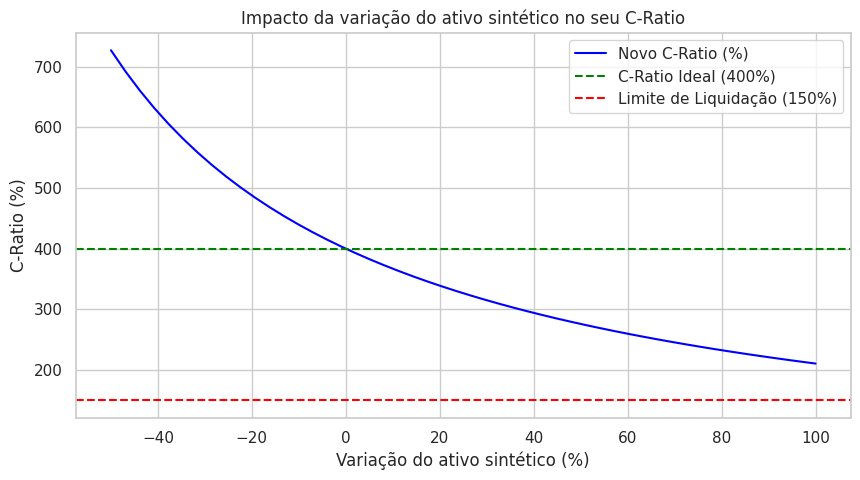

In [17]:
# ----- Parâmetros iniciais -----
colateral_snx = 4000       # Colateral bloqueado
divida_inicial = 1000      # Synths emitidos
divida_outros = 9000       # Dívida emitida por outros stakers

# Dívida total inicial
divida_total_inicial = divida_inicial + divida_outros

# Participação do usuário na pool
participacao = divida_inicial / divida_total_inicial

# ----- Simulação de preços -----
# Variação do ativo sintético (de -50% até +100%)
variacao = np.linspace(-0.5, 1.0, 50)
multiplicadores = 1 + variacao  # 0.5x até 2x

nova_divida_total = []
sua_divida = []
novo_c_ratio = []

for m in multiplicadores:
    # novo valor do ativo emitido pelos outros stakers
    valor_outros_apos = divida_outros * m
    # nova dívida total
    nova_total = divida_inicial + valor_outros_apos
    # sua nova dívida proporcional
    sua_nova = nova_total * participacao
    # novo C-Ratio
    c_ratio = colateral_snx / sua_nova

    nova_divida_total.append(nova_total)
    sua_divida.append(sua_nova)
    novo_c_ratio.append(c_ratio * 100)

# ----- Criar dataframe para ver os números -----
df = pd.DataFrame({
    "Multiplicador Preço": multiplicadores,
    "Nova Dívida Total": nova_divida_total,
    "Sua Nova Dívida": sua_divida,
    "Novo C-Ratio (%)": novo_c_ratio
})

print(df.head(10))  # mostra os primeiros 10 valores

# ----- Gráfico comparativo -----
plt.figure(figsize=(10,5))

# Gráfico do C-Ratio
plt.plot((multiplicadores-1)*100, novo_c_ratio, label="Novo C-Ratio (%)", color='blue')

# Linha de referência do C-Ratio ideal
plt.axhline(400, color='green', linestyle='--', label='C-Ratio Ideal (400%)')
plt.axhline(150, color='red', linestyle='--', label='Limite de Liquidação (150%)')

plt.xlabel("Variação do ativo sintético (%)")
plt.ylabel("C-Ratio (%)")
plt.title("Impacto da variação do ativo sintético no seu C-Ratio")
plt.legend()
plt.grid(True)
plt.show()

# Exemplo 03:

Você = emite sUSD (dólar sintético, estável).

Investidor 2 = emite sETH (Ethereum sintético).

Investidor 3 = emite sBTC (Bitcoin sintético).

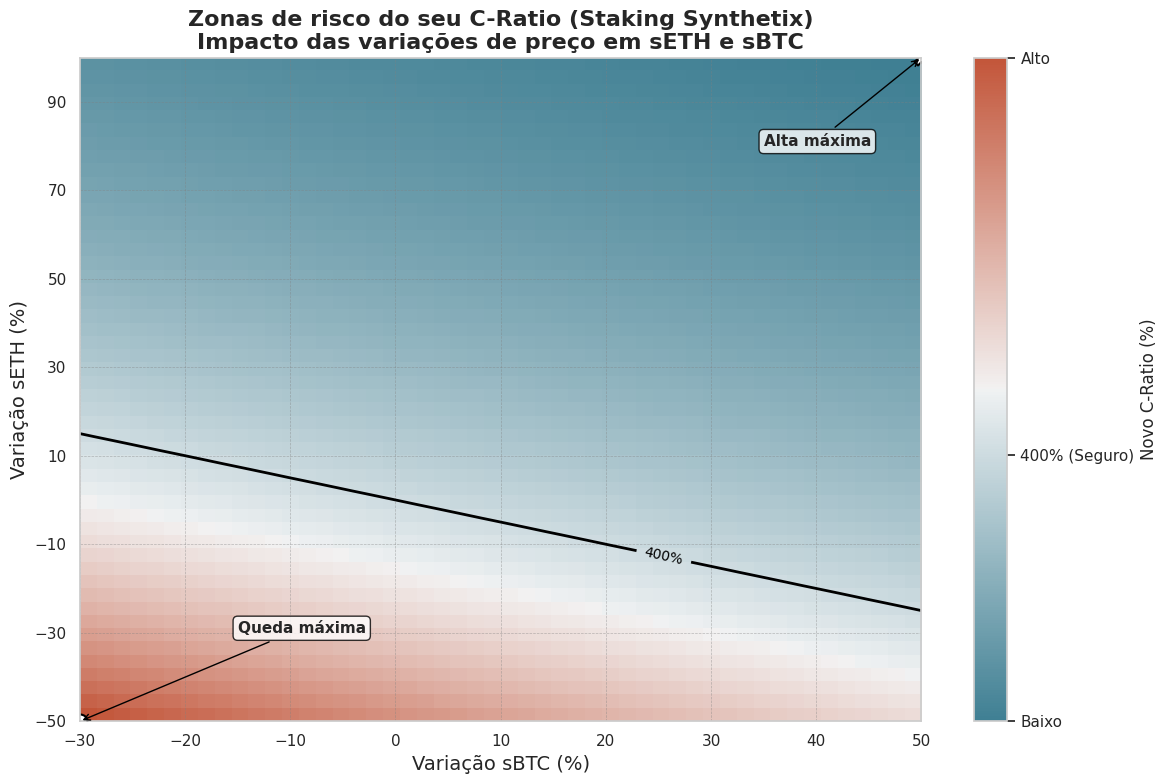

In [18]:


# Parâmetros iniciais (mantidos iguais)
colateral_snx = 4000
divida_voce = 1000
divida_eth = 6000
divida_btc = 3000
divida_total_inicial = divida_voce + divida_eth + divida_btc
participacao_voce = divida_voce / divida_total_inicial

# Simulação
variacao_eth = np.linspace(-0.5, 1.0, 50)
variacao_btc = np.linspace(-0.3, 0.5, 50)

resultados = []
for m_eth in (1 + variacao_eth):
    for m_btc in (1 + variacao_btc):
        valor_eth_apos = divida_eth * m_eth
        valor_btc_apos = divida_btc * m_btc
        nova_divida_total = divida_voce + valor_eth_apos + valor_btc_apos
        sua_nova_divida = nova_divida_total * participacao_voce
        novo_c_ratio = (colateral_snx / sua_nova_divida) * 100
        resultados.append({
            "sETH (%)": (m_eth - 1) * 100,
            "sBTC (%)": (m_btc - 1) * 100,
            "Novo C-Ratio (%)": novo_c_ratio
        })

df = pd.DataFrame(resultados)
pivot = df.pivot_table(index="sETH (%)", columns="sBTC (%)", values="Novo C-Ratio (%)")

# Criando meshgrid para contorno
X, Y = np.meshgrid(pivot.columns.values, pivot.index.values)
Z = pivot.values

# Configurações de plot mais sofisticadas
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")  # Estilo clean com grid

# Paleta diverging suave: vermelho (baixo), amarelo (médio), azul (alto)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot heatmap com contorno suave
heatmap = plt.imshow(Z, cmap=cmap, origin='lower',
                    extent=[pivot.columns.min(), pivot.columns.max(), pivot.index.min(), pivot.index.max()],
                    aspect='auto')

# Barra de cor com ticks customizados e label
cbar = plt.colorbar(heatmap, ticks=[Z.min(), 150, 400, Z.max()])
cbar.ax.set_yticklabels(['Baixo', '150% (Perigo)', '400% (Seguro)', 'Alto'])
cbar.set_label('Novo C-Ratio (%)', fontsize=12)

# Contornos para níveis de risco com linhas sólidas e labels inline
contours = plt.contour(X, Y, Z, levels=[150, 400], colors=['black', 'black'], linewidths=2)
plt.clabel(contours, inline=True, fontsize=10, fmt='%d%%', colors='black')

# Labels e título
plt.xlabel("Variação sBTC (%)", fontsize=14)
plt.ylabel("Variação sETH (%)", fontsize=14)
plt.title("Zonas de risco do seu C-Ratio (Staking Synthetix)\nImpacto das variações de preço em sETH e sBTC", fontsize=16, weight='bold')

# Ajuste ticks e grid
plt.xticks(np.arange(-30, 55, 10))
plt.yticks(np.arange(-50, 110, 20))
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Pontos extremos com anotação estilizada
plt.scatter(50, 100, color='white', marker='X', s=100, edgecolor='black', linewidth=1.5)
plt.annotate("Alta máxima", xy=(50, 100), xytext=(35, 80),
             arrowprops=dict(facecolor='white', edgecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8),
             fontsize=11, weight='bold')

plt.scatter(-30, -50, color='white', marker='o', s=100, edgecolor='black', linewidth=1.5)
plt.annotate("Queda máxima", xy=(-30, -50), xytext=(-15, -30),
             arrowprops=dict(facecolor='white', edgecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8),
             fontsize=11, weight='bold')

plt.tight_layout()
plt.show()
